In [320]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [321]:
#
#
# Problem 1: Diabetes Logistic Regression w/ Standardization 
#
#
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [322]:
X = diabetes.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = diabetes.iloc[:, 8].values
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [323]:
# Split data into training and validation sets before proceeding
from sklearn.model_selection import train_test_split
np.random.seed(0)
trainX, validX, trainY, validY = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(trainX[:5])
print(trainY[:5])

[[7.00e+00 1.50e+02 7.80e+01 2.90e+01 1.26e+02 3.52e+01 6.92e-01 5.40e+01]
 [4.00e+00 9.70e+01 6.00e+01 2.30e+01 0.00e+00 2.82e+01 4.43e-01 2.20e+01]
 [0.00e+00 1.65e+02 9.00e+01 3.30e+01 6.80e+02 5.23e+01 4.27e-01 2.30e+01]
 [1.00e+00 1.09e+02 5.60e+01 2.10e+01 1.35e+02 2.52e+01 8.33e-01 2.30e+01]
 [8.00e+00 1.20e+02 0.00e+00 0.00e+00 0.00e+00 3.00e+01 1.83e-01 3.80e+01]]
[1 0 0 0 1]


In [324]:
# Standardize the data first
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

standard = StandardScaler()
trainX = standard.fit_transform(trainX)   #standardize training x data
validX = standard.fit_transform(validX)   #standardize validation x data
print('Standardized training x:')
print(trainX[:5])
print('Training y:')
trainY[:5] #non-standardized

Standardized training x:
[[ 0.90832902  0.91569367  0.44912368  0.52222619  0.3736349   0.37852648
   0.67740401  1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103  0.14814855 -0.69965674 -0.50667229
  -0.07049698 -0.96569189]
 [-1.12606292  1.38763205  1.06340683  0.77161128  5.09271083  2.54094063
  -0.11855487 -0.88240283]
 [-0.8354355  -0.37427121 -0.67706208  0.02345601  0.45029859 -0.88604319
   1.10091422 -0.88240283]
 [ 1.19895644 -0.02818307 -3.54371676 -1.28581572 -0.69965674 -0.27904975
  -0.85143778  0.36693308]]
Training y:


array([1, 0, 0, 0, 1])

In [325]:
classifier = LogisticRegression(random_state=0) #create logistic regression
classifier.fit(trainX, trainY)

LogisticRegression(random_state=0)

In [326]:
predictedY = classifier.predict(validX)
predictedY[:5]

array([1, 0, 0, 1, 0])

In [327]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(validY, predictedY)
confMatrix

array([[94, 13],
       [18, 29]])

In [328]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(validY, predictedY))
print("Precision:", metrics.precision_score(validY, predictedY))
print("Recall:", metrics.recall_score(validY, predictedY))

Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

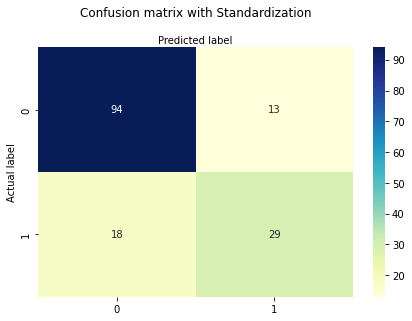

In [329]:
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(confMatrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix with Standardization', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [330]:
#
#
# Problem 1b: Logistic Regression w/ MinMax
#
#
minMax = MinMaxScaler()
trainX = minMax.fit_transform(trainX)   #minMax training x data
validX = minMax.fit_transform(validX)   #minMax validation x data
print('Standardized training x:')
print(trainX[:5])
print('Training y:')
trainY[:5] #non-minMax

Standardized training x:
[[0.41176471 0.75757576 0.63934426 0.29292929 0.14893617 0.52459016
  0.26216909 0.55      ]
 [0.23529412 0.48989899 0.49180328 0.23232323 0.         0.42026826
  0.1558497  0.01666667]
 [0.         0.83333333 0.73770492 0.33333333 0.80378251 0.77943368
  0.14901793 0.03333333]
 [0.05882353 0.55050505 0.45901639 0.21212121 0.15957447 0.37555887
  0.32237404 0.03333333]
 [0.47058824 0.60606061 0.         0.         0.         0.44709389
  0.04483348 0.28333333]]
Training y:


array([1, 0, 0, 0, 1])

In [331]:
classifier = LogisticRegression(random_state=0) #create logistic regression
classifier.fit(trainX, trainY)

LogisticRegression(random_state=0)

In [332]:
predictedY = classifier.predict(validX)
predictedY[:5]

array([1, 0, 0, 1, 0])

In [333]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(validY, predictedY)
confMatrix

array([[79, 28],
       [ 8, 39]])

In [334]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(validY, predictedY))
print("Precision:", metrics.precision_score(validY, predictedY))
print("Recall:", metrics.recall_score(validY, predictedY))

Accuracy: 0.7662337662337663
Precision: 0.582089552238806
Recall: 0.8297872340425532


Text(0.5, 257.44, 'Predicted label')

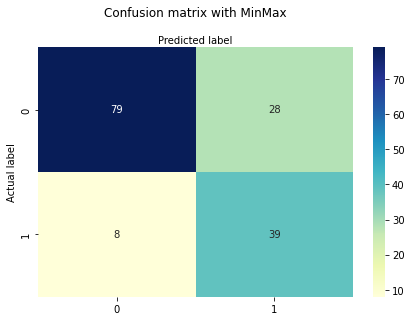

In [335]:
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(confMatrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix with MinMax', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [336]:
#
#
# Problem 2a: Using 5-fold Cross-Validation
#
#

Xstd = standard.fit_transform(X)
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, Xstd, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.600% (2.777%)


In [337]:
#
#
# Problem 2b: Using 10-fold Cross-Validation
#
#
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, Xstd, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.604% (5.036%)


In [338]:
#
#
# Problem 3a: Cancer Logistic Regression w/ Standardization
#
#
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancerData = cancer.data
cancerTable = pd.DataFrame(cancerData)
cancerTable.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [339]:
diag = cancer.target
diag[:5]

array([0, 0, 0, 0, 0])

In [340]:
diag = np.reshape(diag,(569,1))
finalCancerData = np.concatenate([cancerData,diag], axis=1)
finalCancerData.shape

(569, 31)

In [341]:
finalCancerTable = pd.DataFrame(finalCancerData)
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [342]:
finalFeatures = np.append(features, 'diagnosis')
finalCancerTable.columns = finalFeatures
finalCancerTable.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [343]:
X = finalCancerTable.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values
Y = finalCancerTable.iloc[:, 30].values
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [344]:
np.random.seed(0) #split raw data into training and validation sets
trainX, validX, trainY, validY = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(trainX[:5])
print(trainY[:5])

[[1.005e+01 1.753e+01 6.441e+01 3.108e+02 1.007e-01 7.326e-02 2.511e-02
  1.775e-02 1.890e-01 6.331e-02 2.619e-01 2.015e+00 1.778e+00 1.685e+01
  7.803e-03 1.449e-02 1.690e-02 8.043e-03 2.100e-02 2.778e-03 1.116e+01
  2.684e+01 7.198e+01 3.840e+02 1.402e-01 1.402e-01 1.055e-01 6.499e-02
  2.894e-01 7.664e-02]
 [1.080e+01 2.198e+01 6.879e+01 3.599e+02 8.801e-02 5.743e-02 3.614e-02
  1.404e-02 2.016e-01 5.977e-02 3.077e-01 1.621e+00 2.240e+00 2.020e+01
  6.543e-03 2.148e-02 2.991e-02 1.045e-02 1.844e-02 2.690e-03 1.276e+01
  3.204e+01 8.369e+01 4.895e+02 1.303e-01 1.696e-01 1.927e-01 7.485e-02
  2.965e-01 7.662e-02]
 [1.614e+01 1.486e+01 1.043e+02 8.000e+02 9.495e-02 8.501e-02 5.500e-02
  4.528e-02 1.735e-01 5.875e-02 2.387e-01 6.372e-01 1.729e+00 2.183e+01
  3.958e-03 1.246e-02 1.831e-02 8.747e-03 1.500e-02 1.621e-03 1.771e+01
  1.958e+01 1.159e+02 9.479e+02 1.206e-01 1.722e-01 2.310e-01 1.129e-01
  2.778e-01 7.012e-02]
 [1.218e+01 1.784e+01 7.779e+01 4.511e+02 1.045e-01 7.057e-02 2.490

In [345]:
trainX = standard.fit_transform(trainX)   #standardize training x data
validX = standard.fit_transform(validX)   #standardize validation x data
print('Standardized training x:')
print(trainX[:5])
print('Training y:')
trainY[:5] #non-standardized

Standardized training x:
[[-1.15036482 -0.39064196 -1.12855021 -0.95876358  0.3109837  -0.5959945
  -0.80259612 -0.80249002  0.29453906  0.0942515  -0.4950523   1.48720153
  -0.51448782 -0.49154005  0.28149837 -0.60451206 -0.46900701 -0.61170002
   0.05798237 -0.35763702 -1.0431756   0.21353282 -1.0360446  -0.84880771
   0.34249851 -0.73009743 -0.81232053 -0.75798367 -0.01614761 -0.38503402]
 [-0.93798972  0.68051405 -0.94820146 -0.82152548 -0.60963604 -0.90986721
  -0.66066905 -0.89871612  0.75493453 -0.42547082 -0.33381757  0.75941203
  -0.28751805 -0.42127695 -0.1620797  -0.20486693 -0.05029632 -0.20309076
  -0.25469005 -0.39139463 -0.71565415  1.06684183 -0.68992205 -0.66869703
  -0.09553745 -0.53786647 -0.37504806 -0.60687023  0.09669004 -0.38615797]
 [ 0.574121   -1.03333557  0.51394098  0.40858627 -0.10616078 -0.36301886
  -0.41799048 -0.08844569 -0.27182044 -0.57522132 -0.57672579 -1.05784511
  -0.53856037 -0.38708923 -1.07211882 -0.72057496 -0.42362791 -0.49218988
  -0.6748436

array([1., 1., 1., 1., 1.])

In [378]:
classifier = LogisticRegression(random_state=0) #create logistic regression
classifier.fit(trainX, trainY)

LogisticRegression(random_state=0)

In [379]:
predictedY = classifier.predict(validX) #predict result based on classifier
predictedY[:5]

array([0., 1., 1., 1., 1.])

In [380]:
confMatrix = confusion_matrix(validY, predictedY)
confMatrix

array([[44,  3],
       [ 2, 65]])

In [381]:
print("Accuracy:", metrics.accuracy_score(validY, predictedY))
print("Precision:", metrics.precision_score(validY, predictedY))
print("Recall:", metrics.recall_score(validY, predictedY))

Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

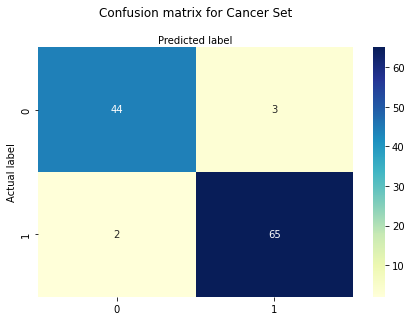

In [383]:
import seaborn as sns 
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(confMatrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Cancer Set', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [384]:
#
#
# Problem 3b: Cancer Logistic Regression w/ Weight Penalty
#
#

C = [10, 1, 0.1, 0.01]
for c in C:
    pen = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    pen.fit(trainX, trainY)
    print('C:', c)
    print('Training accuracy:', pen.score(trainX, trainY))
    print('Validation accuracy:', pen.score(validX, validY))
    print(' ')

C: 10
Training accuracy: 0.989010989010989
Validation accuracy: 0.956140350877193
 
C: 1
Training accuracy: 0.989010989010989
Validation accuracy: 0.956140350877193
 
C: 0.1
Training accuracy: 0.9758241758241758
Validation accuracy: 0.9736842105263158
 
C: 0.01
Training accuracy: 0.9274725274725275
Validation accuracy: 0.9210526315789473
 


In [385]:
pen = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
pen.fit(trainX, trainY)
print('C:', c)
print('Training accuracy:', pen.score(trainX, trainY))
print('Validation accuracy:', pen.score(validX, validY))
print(' ')

C: 0.01
Training accuracy: 0.9758241758241758
Validation accuracy: 0.9736842105263158
 


In [386]:
predictedY = pen.predict(validX) #predict result based on weighted model
predictedY[:5]

array([0., 1., 1., 1., 1.])

In [387]:
print("Accuracy:", metrics.accuracy_score(validY, predictedY))
print("Precision:", metrics.precision_score(validY, predictedY))
print("Recall:", metrics.recall_score(validY, predictedY))

Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716


In [388]:
#
#
# Problem 4a: Cancer 5-fold Cross-Validation
#
#

Xstd = standard.fit_transform(X)
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, Xstd, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.193% (1.701%)


In [389]:
#
#
# Problem 4a: Cancer 10-fold Cross-Validation
#
#

kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, Xstd, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.895% (2.046%)


In [390]:
#
#
# Problem 4b: Cancer 5-fold Cross-Validation w/ Weight Penalty
#
#

Xstd = standard.fit_transform(X)
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(penalty='l1', C = 1, solver = 'liblinear')
results = cross_val_score(model, Xstd, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.368% (1.840%)


In [391]:
#
#
# Problem 4b: Cancer 10-fold Cross-Validation w/ Weight Penalty
#
#

kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(penalty='l1', C = 1, solver = 'liblinear')
results = cross_val_score(model, Xstd, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.719% (2.360%)
